In [2]:
# Imports and API Token
try:
    import qiskit
    import qiskit_superstaq as qss
except ImportError:
    print("Installing qiskit-superstaq...")
    %pip install --quiet 'qiskit-superstaq[examples]'
    print("Installed qiskit-superstaq.")
    print("You may need to restart the kernel to import newly installed packages.")
    import qiskit
    import qiskit_superstaq as qss

# 1) What is a Quantum Computer?

## 1. Qubits  

- A quantum computer is a device that processes information by leveraging quantum properties, in particular **superposition** and **entanglement**.

- The quantum analog to the classical bit is the qubit (quantum bit). While the bit can either be in state $0$ or $1$, the qubit can be in a **superposition** of the states $|0\rangle$ and $|1\rangle$. This means that its quantum state can be described by:
$$
    a|0\rangle + b|1\rangle
$$
Where $a$ and $b$ are complex numbers such that:
$$
    |a|^2+|b|^2 = 1
$$
- The issue is that we do not have access to this superposition of states directly but rather via measurements that will only return $0$ or $1$. The result of a measurement is nonetheless correlated to the quantum state of the qubit in the sense that the probabilities to measure $0$ or $1$ are $|a|^2$ or $|b|^2$ respectively. Following the measurement, the qubit will collapse to the measured state.

- As an example, we consider the qubit $|q\rangle$ in the state:
$$
    |q\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle
$$
As stated previously we can not observe this quantum state, only measure it. A measurement of this state would then return $0$ with probability $\left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$ and $1$ with probability $\left|\frac{i}{\sqrt{2}}\right|^2 = \frac{1}{2}$. If $0$ is measured, then immediately after the measurement, we will have $|q\rangle = |0\rangle$. Similarly, if $1$ is measured, then immediately after the measurement, we will have $|q\rangle = |1\rangle$.

- <font color='red'>Describe multiple qubits</font>

- <font color='red'>**Entanglement** is a quantum property concerning 2 or more qubits where </font>

- While the superposition property can be intriguing, it, alone, does not lead to any speedup. This is a result of the imperative measurements which reduce any quantum computation to a classical one.

- It is only when superposition is used with entanglement that quantum computing can provide an advantage over classical computing.  


## 2. Quantum Gates

- One of the ways to perform quantum computation is through the use of quantum gates. Similarly to logic gates, quantum gates can act on one or more qubits. 

- To better explain the effect of a quantum gate on qubits, it is common and convenient to adopt a matrix representation. One commonly used quantum gate is the Hadamard gate ($\mathbf{H}$) for which the matrix representation is:
$$
    \mathbf{H} = 
        \begin{bmatrix}
            \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
            \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
        \end{bmatrix}
$$
The effect of this gate on a qubit in state $|0\rangle$, denoted $\mathbf{H}|0\rangle$, is described by the first column while the effect on $|1\rangle$, denoted $\mathbf{H}|1\rangle$, is described by the second column. If $|0\rangle$ is given as input of $\mathbf{H}$, the resulting quantum state will be:
$$
    \mathbf{H}|0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
$$
Similarly, if $|1\rangle$ is given as input of $\mathbf{H}$, the resulting quantum state will be:
$$
    \mathbf{H}|1\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle
$$

- Another commom gate is the $\mathbf{X}$ gate for which the matrix is:
$$
    \mathbf{X} = \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}
$$
We then have on $|0\rangle$:
$$
    \mathbf{X}|0\rangle = 0|0\rangle + 1|1\rangle = |1\rangle 
$$
And on $|1\rangle$:
$$
    \mathbf{X}|1\rangle = 1|0\rangle + 0|1\rangle = |0\rangle
$$

- An example of a gate acting on more than one qubit is the controlled $\mathbf{X}$ gate ($\mathbf{CX}$) that takes as input 2 qubits (a control qubit and a target qubit) and acts as a $\mathbf{X}$ gate on the target qubit when the control qubit is in state $|1\rangle$. If we apply this gate to 2 qubits where the first one is the control and the second is the target, then:
$$
    \mathbf{CX}|00\rangle = |00\rangle, \ \mathbf{CX}|01\rangle = |01\rangle, \ \mathbf{CX}|10\rangle = |11\rangle \text{ and } \mathbf{CX}|11\rangle = |10\rangle
$$
And we have the matrix following matrix representation:
$$
    \mathbf{CX} = 
        \begin{bmatrix}
            1 & 0 & 0 & 0 \\ 
            0 & 1 & 0 & 0 \\
            0 & 0 & 0 & 1 \\
            0 & 0 & 1 & 0
        \end{bmatrix} 
$$
- One important property of the quantum gates is the linearity: if a qubit is in a superposition, then the result of a gate applied to this qubit will also be a superposition. More precisely, assume that we have the qubit 
$$
    |q\rangle = a|0\rangle + b|1\rangle
$$
Then, for example:
$$
    \mathbf{H}|q\rangle = a \mathbf{H}|0\rangle + b \mathbf{H}|1\rangle = a \left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\right) + b \left(\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle\right) = \frac{a+b}{\sqrt{2}}|0\rangle + \frac{a-b}{\sqrt{2}}|1\rangle 
$$

- Multiple gates can also be executed sequentially. For example, let us work with 2 qubits starting in the state $|00\rangle$. We apply the $\mathbf{H}$ gate to the first qubit resulting in the quantum state:

\begin{equation}\label{eq:H|0>}\tag{1}
    \left(\mathbf{H}|0\rangle\right)|0\rangle = \left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\right)|0\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle
\end{equation}

Then applying the $\mathbf{CX}$ gate to the previous state leads to:
\begin{equation}\label{eq:CXH|0>}\tag{2}
    \frac{1}{\sqrt{2}}\mathbf{CX}|00\rangle + \frac{1}{\sqrt{2}}\mathbf{CX}|10\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle
\end{equation}

- The 2 qubits are now in an enta3ngled state 

- In addition to the gates already mentionned ($\mathbf{H}$, $\mathbf{X}$, $\mathbf{CX}$), we introduce some additional common gates that might be useful:
$$
    \mathbf{Y} = \begin{bmatrix}0&-i\\i&0\end{bmatrix} \text{ and } \mathbf{Z} =\begin{bmatrix}1&0\\0&-1\end{bmatrix}
$$


# 2) Quantum Circuits

- <font color="red">A quantum circuit is the graphical representation</font>


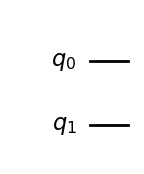

In [3]:
qc = qiskit.QuantumCircuit(2)
qc.draw("mpl", style="clifford")

The line `qc = qiskit.QuantumCircuit(2)` creates a quantum circuit with 2 qubits ($q_0$ and $q_1$) that is stored in the variable `qc`.

`qc.draw("mpl", style="clifford")` then draws the circuit stored in `qc`. The arguments `"mpl"` and `"clifford"` are only here to control the style of the drawing.

By default, each qubit is initialised to the state $|0\rangle$ so at this stage, the 2 qubits are in the state:
$$
    |q_0q_1\rangle = |00\rangle
$$
Now that the circuit has been created, we add a $\mathbf{H}$ gate to act on the first qubit ($q_0$) with the line `qc.h(0)`:

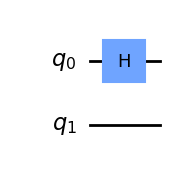

In [4]:
qc.h(0)
qc.draw("mpl", style="clifford")

Here the argument refers to the index of the qubit upon which the gate should act. 

Following this gate, according to Equation (1), the 2 qubits are in the state:
$$
    |q_0q_1\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle
$$
In order to entangle the 2 qubits, we now add to the circuit a $\mathbf{CX}$ gate with `qc.cx(0, 1)`:

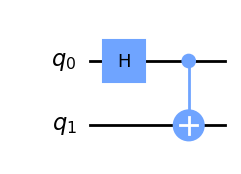

In [5]:
qc.cx(0, 1)
qc.draw("mpl", style="clifford")

Here the first argument refers to the index of the control qubit ($q_0$) and the index of the target qubit ($q_1$). 

Finally, as said previously, we do not have direct access to the quantum state but we can only perform measurements that will output a classical information. The measurement can be added to the circuit with the line `qc.measure_all()`:

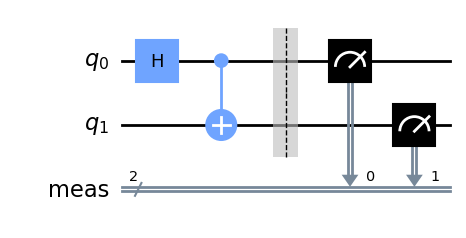

In [6]:
qc.measure_all()
qc.draw("mpl", style="clifford")

As the 2 qubits system is in a superposition of states, the outcome of the measurement will be at random among the states present in the superposition. In this case, the possible outcomes are $00$ or $11$ and they will happen with probability $\frac{1}{2}$ each. 

We verify this by finally running the quantum circuit we have just created.

- Add verbiage about Superstaq sign-up process to get API keys
- Explore having back API keys on the side..

In [11]:
# provider = qss.SuperstaqProvider(api_key="Insert your API key here.")
provider = qss.SuperstaqProvider()
simulator = provider.get_backend("ibmq_qasm_simulator")
job = simulator.run(qc, method="dry-run", shots=1000)
job.status()

<JobStatus.DONE: 'job has successfully run'>

{'00': 511, '11': 489}


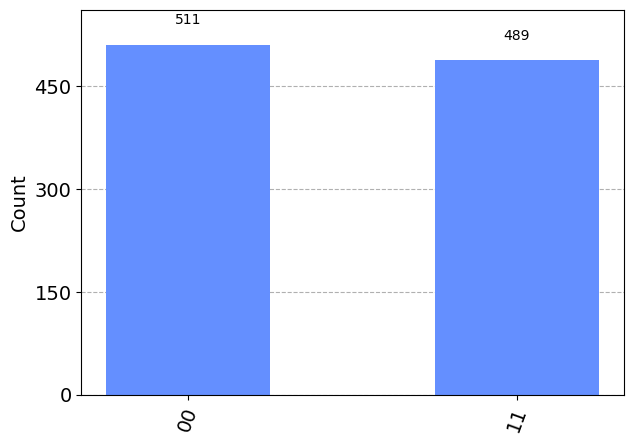

In [12]:
result = job.result().get_counts()
print(result)
qiskit.visualization.plot_histogram(result)

# 3) Qubit Visualization


In [13]:
import IPython

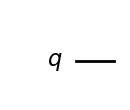

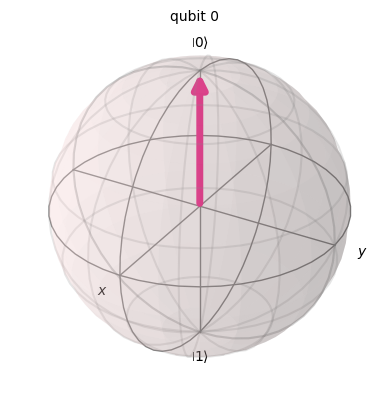

In [14]:
ground_state = qiskit.QuantumCircuit(1)
IPython.display.display(ground_state.draw("mpl", style="clifford"))

sv = qiskit.quantum_info.Statevector(qiskit.quantum_info.Statevector(ground_state))
sv
qiskit.visualization.plot_bloch_multivector(sv)

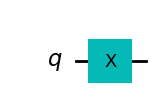

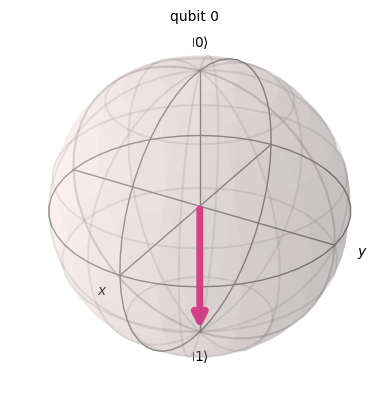

In [15]:
qc = qiskit.QuantumCircuit(1)
qc.x(0)
IPython.display.display(qc.draw("mpl", style="clifford"))

sv = qiskit.quantum_info.Statevector(qiskit.quantum_info.Statevector(qc))
sv
qiskit.visualization.plot_bloch_multivector(sv)

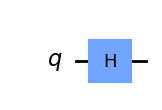

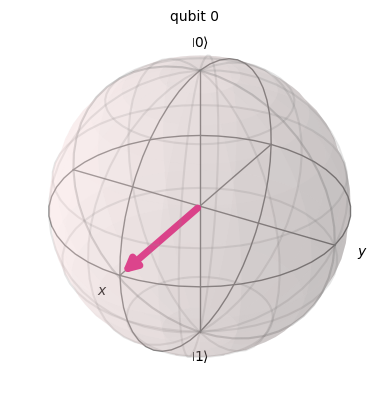

In [16]:
qc = qiskit.QuantumCircuit(1)
qc.h(0)
IPython.display.display(qc.draw("mpl", style="clifford"))

sv = qiskit.quantum_info.Statevector(qiskit.quantum_info.Statevector(qc))
sv
qiskit.visualization.plot_bloch_multivector(sv)

In [17]:
# Bloch multivector for 2 qubits...

# qc = qiskit.QuantumCircuit(2, 2)
# qc.h(0)
# qc.cx(0, 1)
# qc.measure([0, 1], [0, 1])
# print(qc.draw())

# sv = qiskit.quantum_info.Statevector(qc.remove_final_measurements(inplace=False))
# print(sv)
# qiskit.visualization.plot_state_qsphere(sv, figsize=(4, 4))

- Also consider describing classical simulation of quantum computation (e.g., `method="dry-run"`...)
- Describe hardware for qubits, gates, measurement, etc. (for Hilbert & OQC Lucy/Toshiko)

# 3) Use Case: Distributed Databases
- What is **fingerprinting**?
- *A single bit can fingerprint two files...*

# 4) Measuring Performance
- Task: given 6 maximally-distinguishable quantum states (to minimise fingerprint overlap), choose circuits to obtain them.
- What is a **swap test**?
- *Adversarial model: determine worst-case file comparison error using swap test...*
- Single swap test (but mention exponential error suppression w/ repetition)

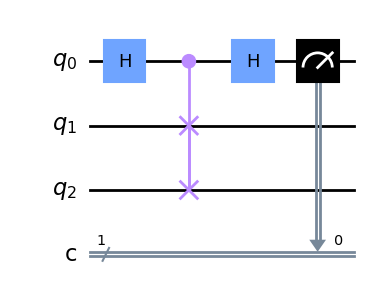

In [22]:
circuits = []
# for all pairs of circuits
#     do swap test to measure overlap
#     record overlaps

qc = qiskit.QuantumCircuit(3, 1)
qc.h(0)
qc.cswap(0, 1, 2)
qc.h(0)
qc.measure([0], [0])
qc.draw("mpl", style="clifford")

In [ ]:
from qcaas_client.client import OQCClient, QPUTask
client = OQCClient(
    url=<qcaas_domain_url>,
    email=<user_email>,
    password=<user_password>,
)

job = QPUTask(program=qc.qasm())
results = client.schedule_tasks(job)

# 5) (Challenge) Larger Systems (2-qubit states)